In [65]:
import math 
from PIL import Image
import numpy as np
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random
from collections import defaultdict
import operator
from skimage import io
import cv2
import sys
import random 

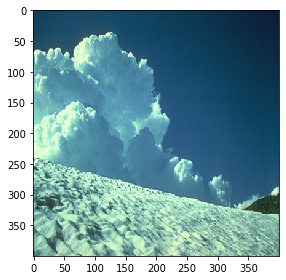

In [66]:
image=Image.open('./Images/5.jpg')
image=image.resize((400,400))
image=np.asarray(image)
io.imshow(image)

In [67]:
pixels=[]
for i in range(400):
    for j in range(400):
        pixels.append([image[i][j],i,j])

In [68]:
pixels

[[array([13, 61, 84], dtype=uint8), 0, 0],
 [array([14, 62, 85], dtype=uint8), 0, 1],
 [array([16, 64, 86], dtype=uint8), 0, 2],
 [array([16, 64, 86], dtype=uint8), 0, 3],
 [array([15, 63, 85], dtype=uint8), 0, 4],
 [array([15, 63, 85], dtype=uint8), 0, 5],
 [array([15, 63, 85], dtype=uint8), 0, 6],
 [array([13, 61, 83], dtype=uint8), 0, 7],
 [array([14, 62, 84], dtype=uint8), 0, 8],
 [array([17, 65, 87], dtype=uint8), 0, 9],
 [array([17, 65, 87], dtype=uint8), 0, 10],
 [array([16, 64, 87], dtype=uint8), 0, 11],
 [array([17, 65, 88], dtype=uint8), 0, 12],
 [array([16, 64, 87], dtype=uint8), 0, 13],
 [array([14, 62, 83], dtype=uint8), 0, 14],
 [array([18, 66, 88], dtype=uint8), 0, 15],
 [array([17, 66, 88], dtype=uint8), 0, 16],
 [array([14, 64, 86], dtype=uint8), 0, 17],
 [array([13, 63, 86], dtype=uint8), 0, 18],
 [array([16, 66, 89], dtype=uint8), 0, 19],
 [array([15, 65, 88], dtype=uint8), 0, 20],
 [array([16, 66, 89], dtype=uint8), 0, 21],
 [array([17, 67, 90], dtype=uint8), 0, 22]

In [69]:
band=50
select=[[-1 for i in range(400)] for j in range(400)]
center=[]
k=0
while len(pixels)>100:
    print('itr ',k,len(pixels))
    ind=random.randint(0,len(pixels))
#     i=pixels[ind][1]
#     j=pixels[ind][2]
    curr=pixels[ind][0]
    
    while True:
        print("\t",curr)
        newC=[0,0,0]
        count=0
        taken=[]
        for i in range(len(pixels)):
#             print(i)
            x=pixels[i][1]
            y=pixels[i][2]
            p=pixels[i][0]
            dist=sqrt(pow(curr[0]-p[0],2)+pow(curr[1]-p[1],2)+pow(curr[2]-p[2],2))
            if dist<=band:
                select[x][y]=k
                newC[0]+=p[0]
                newC[1]+=p[1]
                newC[2]+=p[2]
                count+=1
                taken.append(i)
        newC[0]/=count
        newC[1]/=count
        newC[2]/=count
        print("taken",len(taken))
        change=sqrt(pow(curr[0]-newC[0],2)+pow(curr[1]-newC[1],2)+pow(curr[2]-newC[2],2))
        if change<0.5:
            newPix=[]
            for i in range(len(pixels)):
                if i not in taken:
                    newPix.append(pixels[i])
            pixels=newPix
            center.append(newC)
            break
        else:
            curr=newC
    k+=1
    
        

itr  0 160000
	 [175 228 192]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in ubyte_scalars


taken 10352
	 [156.0721599690881, 207.38736476043277, 182.32901854714066]
taken 31082
	 [153.6101923943118, 207.79438260086224, 185.9051219355254]
taken 31326
itr  1 128674
	 [42 71 53]
taken 759
	 [31.62582345191041, 55.926218708827406, 38.54413702239789]
taken 16564
	 [15.179606375271673, 49.214561700072444, 70.9580415358609]
taken 46765
	 [17.353747460707794, 62.41447663851171, 88.68108628247622]
taken 61244
	 [21.411305597283, 67.62218339755731, 96.0006694533342]
taken 64012
	 [22.958945197775417, 69.83785852652628, 98.79588202212085]
taken 64608
	 [23.55833642892521, 70.69706537890045, 99.76550891530461]
taken 64643
	 [23.788654610708043, 71.06189378587008, 100.16571013102734]
taken 64707
itr  2 63967
	 [ 71 112  98]
taken 234
	 [65.38034188034187, 101.84188034188034, 89.56410256410257]
taken 4595
	 [68.82285092491838, 112.02981501632209, 117.97867247007618]
taken 22495
	 [71.72460546788174, 124.64454323182929, 144.27686152478327]
taken 38226
	 [77.40914560770156, 133.884345733270

In [60]:
center

[[234.64041536813986, 214.92158301948092, 177.98854488791557],
 [225.16355607889315, 171.83208713570798, 109.65357668531057],
 [250.4891473471293, 250.37439707484052, 243.00233390384315],
 [27.415418721440528, 21.580102248563545, 25.6742523639325],
 [214.33583088038534, 132.97176879850147, 53.26705913834627],
 [87.42492492492492, 67.27427427427428, 53.273773773773776],
 [149.90024529844644, 125.16107931316435, 88.81520850367947],
 [183.26095238095238, 170.11809523809524, 151.75047619047618],
 [159.61481481481482, 95.81111111111112, 27.555555555555557],
 [100.72649572649573, 104.08547008547009, 112.1025641025641],
 [237.79, 86.36, 84.15],
 [151.8684210526316, 69.8157894736842, 81.28947368421052]]

In [44]:
select

[[-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  17,
  -1,
  17,
  17,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  17,
  17,
  17,
  17,
  17,
  17,
  -1,
  -1,
  -1,
  6,
  6,
  6,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
 

In [61]:
output=[[0 for i in range(400)] for j in range(400)]
for i in range(400):
    for j in range(400):
        if select[i][j]==-1:
            maxDist=float('inf')
            ind=-1
            pix=image[i][j]
            for k in range(len(center)):
                c=center[k]
                dist=sqrt(pow(c[0]-pix[0],2)+pow(c[1]-pix[1],2)+pow(c[2]-pix[2],2))
                if dist<maxDist:
                    maxDist=dist
                    ind=k
            output[i][j]=center[ind]
        else:
            output[i][j]=center[select[i][j]]

In [62]:
outImg=np.asarray(output,dtype=uint8)


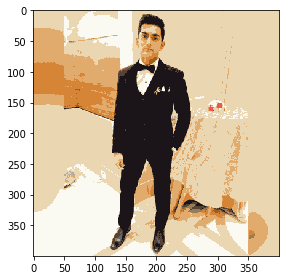

In [63]:
io.imshow(outImg)

In [64]:
plt.imsave('./Output/Q4.png',outImg)